In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [3]:
dataset = pd.read_csv("/Users/anshulreddy/R_storage/marketing_sample_for_amazon_com-ecommerce__20200101_20200131__10k_data.csv")

In [4]:
dataset.head(5)

,Uniq Id,Product Name,Brand Name,Asin,Category,Upc Ean Code,List Price,Selling Price,Quantity,Model Number,...,Product Url,Stock,Product Details,Dimensions,Color,Ingredients,Direction To Use,Is Amazon Seller,Size Quantity Variant,Product Description
0,4c69b61db1fc16e7013b43fc926e502d,"DB Longboards CoreFlex Crossbow 41"" Bamboo Fib...",NaN,NaN,Sports & Outdoors | Outdoor Recreation | Skate...,NaN,NaN,$237.68,NaN,NaN,...,https://www.amazon.com/DB-Longboards-CoreFlex-...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
1,66d49bbed043f5be260fa9f7fbff5957,"Electronic Snap Circuits Mini Kits Classpack, ...",NaN,NaN,Toys & Games | Learning & Education | Science ...,NaN,NaN,$99.95,NaN,55324,...,https://www.amazon.com/Electronic-Circuits-Cla...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
2,2c55cae269aebf53838484b0d7dd931a,3Doodler Create Flexy 3D Printing Filament Ref...,NaN,NaN,Toys & Games | Arts & Crafts | Craft Kits,NaN,NaN,$34.99,NaN,NaN,...,https://www.amazon.com/3Doodler-Plastic-Innova...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
3,18018b6bc416dab347b1b7db79994afa,Guillow Airplane Design Studio with Travel Cas...,NaN,NaN,Toys & Games | Hobbies | Models & Model Kits |...,NaN,NaN,$28.91,NaN,142,...,https://www.amazon.com/Guillow-Airplane-Design...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
4,e04b990e95bf73bbe6a3fa09785d7cd0,Woodstock- Collage 500 pc Puzzle,NaN,NaN,Toys & Games | Puzzles | Jigsaw Puzzles,NaN,NaN,$17.49,NaN,62151,...,https://www.amazon.com/Woodstock-Collage-500-p...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN


In [5]:
dataset.shape
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Uniq Id                10002 non-null  object 
 1   Product Name           10002 non-null  object 
 2   Brand Name             0 non-null      float64
 3   Asin                   0 non-null      float64
 4   Category               9172 non-null   object 
 5   Upc Ean Code           34 non-null     object 
 6   List Price             0 non-null      float64
 7   Selling Price          9895 non-null   object 
 8   Quantity               0 non-null      float64
 9   Model Number           8232 non-null   object 
 10  About Product          9729 non-null   object 
 11  Product Specification  8370 non-null   object 
 12  Technical Details      9212 non-null   object 
 13  Shipping Weight        8864 non-null   object 
 14  Product Dimensions     479 non-null    object 
 15  Im

In [6]:
dataset.columns

Index(['Uniq Id', 'Product Name', 'Brand Name', 'Asin', 'Category',
       'Upc Ean Code', 'List Price', 'Selling Price', 'Quantity',
       'Model Number', 'About Product', 'Product Specification',
       'Technical Details', 'Shipping Weight', 'Product Dimensions', 'Image',
       'Variants', 'Sku', 'Product Url', 'Stock', 'Product Details',
       'Dimensions', 'Color', 'Ingredients', 'Direction To Use',
       'Is Amazon Seller', 'Size Quantity Variant', 'Product Description'],
      dtype='object')

In [7]:
#redundant column list which we will not use
colo = [0,2,3,5,6,8,9,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27]

In [8]:

dataset.drop(dataset.columns[colo], axis =1, inplace=True)

In [9]:
dataset.dropna(inplace = True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7216 entries, 0 to 10001
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Product Name           7216 non-null   object
 1   Category               7216 non-null   object
 2   Selling Price          7216 non-null   object
 3   About Product          7216 non-null   object
 4   Product Specification  7216 non-null   object
 5   Shipping Weight        7216 non-null   object
dtypes: object(6)
memory usage: 394.6+ KB


In [10]:
new = dataset["Category"].str.split("|", n = 3, expand = True)

In [11]:
#main category of product

In [12]:
dataset["Main Category"]= new[0]

In [13]:
dataset.drop(columns =["Category"], inplace = True)


In [14]:
dataset.head()


,Product Name,Selling Price,About Product,Product Specification,Shipping Weight,Main Category
0,"DB Longboards CoreFlex Crossbow 41"" Bamboo Fib...",$237.68,Make sure this fits by entering your model num...,Shipping Weight: 10.7 pounds (View shipping ra...,10.7 pounds,Sports & Outdoors
1,"Electronic Snap Circuits Mini Kits Classpack, ...",$99.95,Make sure this fits by entering your model num...,Product Dimensions: 14.7 x 11.1 x 10.2...,4 pounds,Toys & Games
2,3Doodler Create Flexy 3D Printing Filament Ref...,$34.99,Make sure this fits by entering your model num...,ProductDimensions:10.3x3.4x0.8inches|ItemWeigh...,12.8 ounces,Toys & Games
3,Guillow Airplane Design Studio with Travel Cas...,$28.91,Make 8 different Planes at one time. | Experim...,ProductDimensions:3.5x6.2x13inches|ItemWeight:...,13.4 ounces,Toys & Games
4,Woodstock- Collage 500 pc Puzzle,$17.49,Make sure this fits by entering your model num...,ProductDimensions:1.9x8x10inches|ItemWeight:13...,13.4 ounces,Toys & Games


In [15]:
dataset.rename(columns = {'Uniq Id':'Id','Shipping Weight':'Shipping Weight(Pounds)', 'Selling Price':'Selling Price($)'}, inplace = True)

dataset['Shipping Weight(Pounds)'] = dataset['Shipping Weight(Pounds)'].str.strip('ounces')
dataset['Shipping Weight(Pounds)'] = dataset['Shipping Weight(Pounds)'].str.strip('pounds')
dataset['Shipping Weight(Pounds)'] = pd.to_numeric(dataset['Shipping Weight(Pounds)'], errors='coerce')
dataset['Selling Price($)'] = dataset['Selling Price($)'].str.replace('$', '')
dataset['Selling Price($)'] = pd.to_numeric(dataset['Selling Price($)'], errors='coerce')
dataset.head()

/var/folders/p8/8x8vy4td72vfml9k9swgv8m80000gn/T/ipykernel_12373/4196337224.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dataset['Selling Price($)'] = dataset['Selling Price($)'].str.replace('$', '')


,Product Name,Selling Price($),About Product,Product Specification,Shipping Weight(Pounds),Main Category
0,"DB Longboards CoreFlex Crossbow 41"" Bamboo Fib...",237.68,Make sure this fits by entering your model num...,Shipping Weight: 10.7 pounds (View shipping ra...,10.7,Sports & Outdoors
1,"Electronic Snap Circuits Mini Kits Classpack, ...",99.95,Make sure this fits by entering your model num...,Product Dimensions: 14.7 x 11.1 x 10.2...,4.0,Toys & Games
2,3Doodler Create Flexy 3D Printing Filament Ref...,34.99,Make sure this fits by entering your model num...,ProductDimensions:10.3x3.4x0.8inches|ItemWeigh...,12.8,Toys & Games
3,Guillow Airplane Design Studio with Travel Cas...,28.91,Make 8 different Planes at one time. | Experim...,ProductDimensions:3.5x6.2x13inches|ItemWeight:...,13.4,Toys & Games
4,Woodstock- Collage 500 pc Puzzle,17.49,Make sure this fits by entering your model num...,ProductDimensions:1.9x8x10inches|ItemWeight:13...,13.4,Toys & Games


In [16]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7216 entries, 0 to 10001
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product Name             7216 non-null   object 
 1   Selling Price($)         7045 non-null   float64
 2   About Product            7216 non-null   object 
 3   Product Specification    7216 non-null   object 
 4   Shipping Weight(Pounds)  7214 non-null   float64
 5   Main Category            7216 non-null   object 
dtypes: float64(2), object(4)
memory usage: 394.6+ KB


In [17]:
#Data is cleaned we can start EDA
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
# finding out the unique main categories
dataset["Main Category"].unique()

array(['Sports & Outdoors ', 'Toys & Games ',
       'Clothing, Shoes & Jewelry ', 'Home & Kitchen ', 'Pet Supplies ',
       'Arts, Crafts & Sewing ', 'Electronics ', 'Patio, Lawn & Garden ',
       'Tools & Home Improvement ', 'Office Products ', 'Baby Products ',
       'Grocery & Gourmet Food ', 'Video Games ',
       'Remote & App Controlled Vehicle Parts ', 'Health & Household ',
       'Industrial & Scientific ', 'Beauty & Personal Care ',
       'Automotive ', 'Remote & App Controlled Vehicles & Parts ',
       'Musical Instruments ', 'Hobbies ', 'Movies & TV ',
       'Cell Phones & Accessories '], dtype=object)

Text(0, 0.5, 'Count of products')

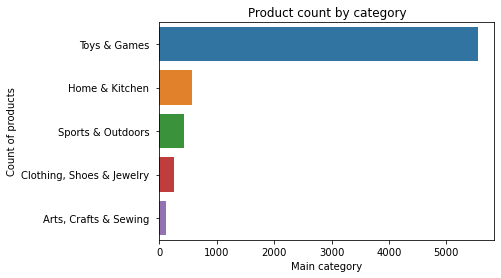

In [19]:
#Top 5 barplot of categories
order = dataset['Main Category'].value_counts()[:5].index
sns.countplot(y='Main Category', data=dataset, order=order)
plt.title("Product count by category")
plt.xlabel("Main category")
plt.ylabel("Count of products")

Text(0.5, 1.0, 'Relationship between Price & Shipping Weight in Toys & Games category')

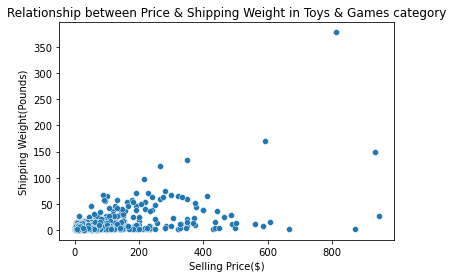

In [20]:
#generate scatterplot to understand the relationship 
toys = dataset[dataset["Main Category"] == 'Toys & Games ']
sns.scatterplot(data=toys, x="Selling Price($)", y="Shipping Weight(Pounds)")
plt.title("Relationship between Price & Shipping Weight in Toys & Games category")

Text(0.5, 1.0, 'Distribution of the Prices in Toys & Games Category')

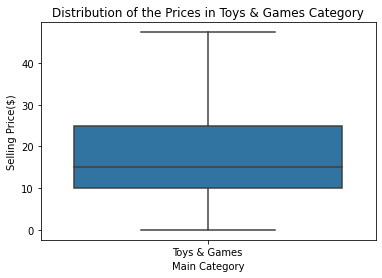

In [21]:
sns.boxplot(data = toys, x='Main Category', y='Selling Price($)', showfliers=False)
plt.title("Distribution of the Prices in Toys & Games Category")

Text(0.5, 1.0, 'Distribution of the Prices in Home & Kitchen Category')

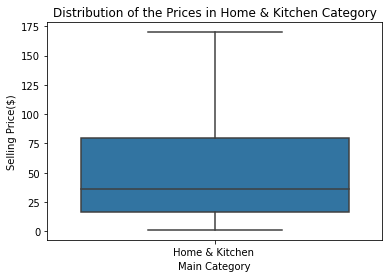

In [22]:
home = dataset[dataset["Main Category"] == 'Home & Kitchen ']
sns.boxplot(data = home, x='Main Category', y='Selling Price($)', showfliers=False)
plt.title("Distribution of the Prices in Home & Kitchen Category")


Text(0.5, 1.0, 'Relationship between Price & Shipping Weight in Home & Kitchen Category')

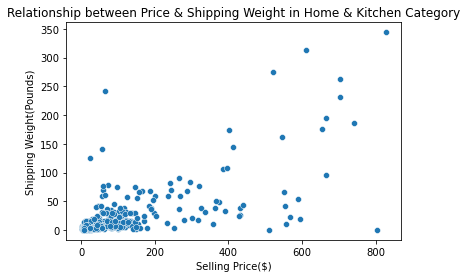

In [23]:
#generate scatterplot to understand the relationship
sns.scatterplot(data=home, x="Selling Price($)", y="Shipping Weight(Pounds)")
plt.title("Relationship between Price & Shipping Weight in Home & Kitchen Category")

In [24]:
#EDA done, we develop our scraper

In [25]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 2000)
pd.set_option('display.float_format', '{:20,.2f}'.format)
pd.set_option('display.max_colwidth', None)


In [26]:
dataset2 = pd.read_csv("/Users/anshulreddy/R_storage/marketing_sample_for_amazon_com-ecommerce__20200101_20200131__10k_data.csv")
dataset2["Category"].head()

0    Sports & Outdoors | Outdoor Recreation | Skates, Skateboards & Scooters | Skateboarding | Standard Skateboards & Longboards | Longboards
1                                                                                   Toys & Games | Learning & Education | Science Kits & Toys
2                                                                                                   Toys & Games | Arts & Crafts | Craft Kits
3                                                             Toys & Games | Hobbies | Models & Model Kits | Model Kits | Airplane & Jet Kits
4                                                                                                     Toys & Games | Puzzles | Jigsaw Puzzles
Name: Category, dtype: object

In [27]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
dataset2["Category"] = dataset2["Category"].fillna("")

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(dataset2["Category"])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(10002, 1133)

In [28]:
#Array mapping from feature integer indices to feature name.
tfidf.get_feature_names()[0:20]

/Users/anshulreddy/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['accent',
 'accents',
 'accessories',
 'accessory',
 'action',
 'activities',
 'activity',
 'additives',
 'adhesives',
 'adirondack',
 'adult',
 'advent',
 'agility',
 'aids',
 'air',
 'airbrush',
 'aircraft',
 'airplane',
 'airplanes',
 'albums']

In [29]:
# Import linear_kernel, cosine_similarity, and sigmoid_kernel
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the cosine similarity matrix
linear = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
sig_score = sigmoid_kernel(tfidf_matrix, tfidf_matrix)

In [30]:
print(linear[1])
print(cosine_sim[1])
print(sig_score[1])


[0.         1.         0.27876877 ... 0.25244281 0.27876877 0.        ]
[0.         1.         0.27876877 ... 0.25244281 0.27876877 0.        ]
[0.76159416 0.76196458 0.76169747 ... 0.76168771 0.76169747 0.76159416]


In [31]:
#This matrix represents each product category's similarity score with every other product category.



In [32]:
#Construct a reverse map of indices and product names
indices = pd.Series(dataset.index, index=dataset["Product Name"])

In [33]:
indices[:20]


Product Name
DB Longboards CoreFlex Crossbow 41" Bamboo Fiberglass Longboard Complete                                                                             0
Electronic Snap Circuits Mini Kits Classpack, FM Radio, Motion Detector, Music Box (Set of 5)                                                        1
3Doodler Create Flexy 3D Printing Filament Refill Bundle (X5 Pack, Over 1000'. of Extruded Plastics! - Innovate                                      2
Guillow Airplane Design Studio with Travel Case Building Kit                                                                                         3
Woodstock- Collage 500 pc Puzzle                                                                                                                     4
Rubie's Child's Pokemon Deluxe Pikachu Costume, X-Small                                                                                              6
ARTSCAPE Etched Glass 24" x 36" Window Film, 24-by-36-Inch                       

In [34]:
pip install fuzzywuzzy


Note: you may need to restart the kernel to use updated packages.


In [35]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

/Users/anshulreddy/opt/anaconda3/lib/python3.9/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [36]:
choices = list(indices.index)

In [37]:
%%time

extracted = process.extract("lego", choices, limit=1)
extracted[0][0]

CPU times: user 1.44 s, sys: 3.65 ms, total: 1.45 s
Wall time: 1.45 s


'LEGO Lunch Box, Medium Pink'

In [38]:
def rec_lin(user_input, linear=linear):
    
    # use fuzzywuzzy to grab the product with name closest to user input
    extracted = process.extract(user_input, choices, limit=1)
    product_name = extracted[0][0]
    
    # Get the index of the product that matches the product name
    idx = indices[product_name]

    # Get the pairwise similarity scores
    sim_scores = list(enumerate(linear[idx]))

    # Sort the products based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar products
    sim_scores = sim_scores[1:11]

    # Get the product indices
    product_indices = [i[0] for i in sim_scores]
    
    df_return = dataset2[["Product Name","Selling Price"]].loc[product_indices]
    # Return the top 10 most similar products
    # return df_return.sort_values(by="Selling Price_processed", ascending=True)[["Product Name","Selling Price"]]
    return df_return

In [39]:
name = input("Item to be searched?")
rec_lin(name)

Item to be searched?arcade


,Product Name,Selling Price
122,Enchantimals Styling Head- Brown Mailer,$18.59
134,Tiny Arcade Pole Position,$16.82
169,"Amscan 399918 6 Piece Game Day Photo Props Kit, One Size, Multicolor",$8.99
270,DIAMOND SELECT TOYS John Wick Vinimate,$9.99
385,Rhode Island Novelty 5 Inch Smile Face Playground Ball,$5.14
485,Harry Potter 9 & 3/4 Platform Soft Touch Magnet,$5.98
492,Forum Novelties Combat Hero Medals,$8.99
509,Redwood Ventures Foodie Surprise Yolkies Surprise Egg,$5.99
639,"amscan Super Mario Brothers Tattoos, Party Favor, 192 Ct.",$5.99
682,Poolmaster Smash 'n' Splash Water Paddle Ball Swimming Pool Game,$13.09


In [40]:
# I entered aracde and it returned top 10 closest searches
#We now scrape cheapest/best rated item for the given item

In [41]:
# Therefore we scrape for "Enchantimals Styling Head- Brown Mailer", remaining 9 can be scraped in similar fashion

In [43]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

In [44]:
page_url_search = "Enchantimals+Styling+Head-+Brown+Mailer"

In [62]:
# Function to extract Product Title
def get_title(soup):

    try:
        # Outer Tag Object
        title = soup.find("span", attrs={"id":'productTitle'})
        
        # Inner NavigatableString Object
        title_value = title.text

        # Title as a string value
        title_string = title_value.strip()

    except AttributeError:
        title_string = ""

    return title_string

# Function to extract Product Price
def get_price(soup):

    try:
        price = soup.find("span", attrs={'class':'a-price aok-align-center reinventPricePriceToPayMargin priceToPay'}).find("span", attrs={'class':'a-offscreen'}).text

    except AttributeError:
        price = ""

    return price   
  

# Function to extract Product Rating
def get_rating(soup):

    try:
        rating = soup.find("i", attrs={'class':'a-icon a-icon-star a-star-4-5'}).string.strip()
    
    except AttributeError:
        try:
            rating = soup.find("span", attrs={'class':'a-icon-alt'}).string.strip()
        except:
            rating = ""	

    return rating

# Function to extract Number of User Reviews
def get_review_count(soup):
    try:
        review_count = soup.find("span", attrs={'id':'acrCustomerReviewText'}).string.strip()

    except AttributeError:
        review_count = ""	

    return review_count

# Function to extract Availability Status
def get_availability(soup):
    try:
        available = soup.find("div", attrs={'id':'availability'})
        available = available.find("span").string.strip()

    except AttributeError:
        available = "Not Available"	

    return available

In [63]:
if __name__ == '__main__':

    # add your user agent 
    HEADERS = ({'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36', 'Accept-Language': 'en-US, en;q=0.5'})

    # The webpage URL
    URL = "https://www.amazon.com/s?k=" + page_url_search

    # HTTP Request
    webpage = requests.get(URL, headers=HEADERS)

    # Soup Object containing all data
    soup = BeautifulSoup(webpage.content, "html.parser")

    # Fetch links as List of Tag Objects
    links = soup.find_all("a", attrs={'class':'a-link-normal s-no-outline'})

    # Store the links
    links_list = []

    # Loop for extracting links from Tag Objects
    for link in links:
            links_list.append(link.get('href'))

    d = {"title":[], "price($)":[], "rating":[], "reviews":[],"availability":[],"URL":links_list}
    
    # Loop for extracting product details from each link 
    for link in links_list:
        new_webpage = requests.get("https://www.amazon.com" + link, headers=HEADERS)

        new_soup = BeautifulSoup(new_webpage.content, "html.parser")

        # Function calls to display all necessary product information
        d['title'].append(get_title(new_soup))
        d['price($)'].append(get_price(new_soup))
        d['rating'].append(get_rating(new_soup))
        d['reviews'].append(get_review_count(new_soup))
        d['availability'].append(get_availability(new_soup))

    
    amazon_df = pd.DataFrame.from_dict(d)
    amazon_df['title'].replace('', np.nan, inplace=True)
    amazon_df = amazon_df.dropna(subset=['title'])
    amazon_df.to_csv("amazon_data.csv", header=True, index=False)

In [64]:
amazon_df

,title,price($),rating,reviews,availability,URL
0,"IMC Toys VIP Pets Color Boost - Includes 1 VIP Pets Doll, 9 Surprises, 6 Accessories| Kids Age 3+ (712003)",$9.96,4.7 out of 5 stars,457 ratings,In Stock,/IMC-Toys-Pets-Color-Boost/dp/B08S25NJY8/ref=sr_1_1?keywords=Enchantimals+Styling+Head-+Brown+Mailer&qid=1682733917&sr=8-1
1,"Enchantimals Sybill Snow Leopard Small Doll (6-in) & Flake Animal Friend Figure, 6-inch Small Doll with Removable Skirt, Snow boots, and Fur Headband, Great Gift for 3 to 8 Year Olds",$9.99,4.8 out of 5 stars,345 ratings,In Stock,/Enchantimals-Sybill-Leopard-Flake-Dolls/dp/B084L28GX4/ref=sr_1_2?keywords=Enchantimals+Styling+Head-+Brown+Mailer&qid=1682733917&sr=8-2
2,"Enchantimals Winsley Wolf Doll & Trooper Animal Figure, 6-Inch Small Doll, With Long Blue Hair, Animal Ears And Furry Tail, Removable Skirt And Shoes, Great Gift For 3 To 8 Year Olds",$16.95,4.8 out of 5 stars,"10,121 ratings",In Stock,/Enchantimals-Winsley-Trooper-Animal-Removable/dp/B077PSC25L/ref=sr_1_3?keywords=Enchantimals+Styling+Head-+Brown+Mailer&qid=1682733917&sr=8-3
3,"Enchantimals City Tails Bunny Farms Market 35+ Piece Playset & Accessories, Great Gift for Kids Ages 4Y+",$14.02,4.6 out of 5 stars,34 ratings,In Stock,/Enchantimals-Tails-Market-Playset-Accessories/dp/B09PB6SPR9/ref=sr_1_4?keywords=Enchantimals+Styling+Head-+Brown+Mailer&qid=1682733917&sr=8-4
4,"Mattel Enchantimals Naddie Narwhal Small Doll (6-in) & Sword Animal Friend Figure, 6-inch Small Doll with Mermaid Skirt, Fins, and Shoes, Great Gift for 3 to 8 Year Olds",$9.99,4.9 out of 5 stars,309 ratings,In Stock,/Enchantimals-Narwhal-Mermaid-Exclusive-GJX41/dp/B084KZY4ZL/ref=sr_1_5?keywords=Enchantimals+Styling+Head-+Brown+Mailer&qid=1682733917&sr=8-5
5,"Enchantimals Bubblin’ Atlantia Mermaid Bubble Maker Doll (7-in) with Dolphin Animal Figure, Great Gift for Kids Ages 3 and Up",$5.62,4.4 out of 5 stars,6 ratings,In Stock,/Enchantimals-Bubblin-Atlantia-Mermaid-Dolphin/dp/B09BW5FL5D/ref=sr_1_6?keywords=Enchantimals+Styling+Head-+Brown+Mailer&qid=1682733917&sr=8-6
6,"Royal Enchantimals Family Toy Set, Deanna Dragon Doll (6-in/15.2-cm), 3 Dragon Figures and 4 Accessories, Great Gift for 3-8 Year Olds",$10.49,4.4 out of 5 stars,627 ratings,In Stock,/Enchantimals-Family-15-2-cm-Figures-Accessories/dp/B08P2DZP86/ref=sr_1_7?keywords=Enchantimals+Styling+Head-+Brown+Mailer&qid=1682733917&sr=8-7
7,"Mattel Enchantimals Family Toy Set, Ofelia Ostrich Doll (6-in) with 3 Animal Figures, Sunny Savanna Collection, Great Gift for 3-8 Year Olds",$12.99,4.8 out of 5 stars,280 ratings,In Stock,/Enchantimals-Ostrich-15-2-cm-Collection-GTM32/dp/B08GLKK95T/ref=sr_1_8?keywords=Enchantimals+Styling+Head-+Brown+Mailer&qid=1682733917&sr=8-8
8,"Mattel Enchantimals City Tails Poodle Do Beauty Salon, Playset with Doll (6-in) and Dog Figures with Color-Change Fun, Great Gift for Kids Ages 4Y+",$15.49,4.4 out of 5 stars,5 ratings,In Stock,/Mattel-Enchantimals-Playset-Figures-Color-Change/dp/B09P9KG5G7/ref=sr_1_9?keywords=Enchantimals+Styling+Head-+Brown+Mailer&qid=1682733917&sr=8-9
9,Enchantimals Jessa Jellyfish Doll (6in) with Color-Changing Hair and Marisa Water Animal Figure,$32.99,4.7 out of 5 stars,114 ratings,Only 3 left in stock - order soon,/Enchantimals-FKV57-Jessa-Jellyfish-Dolls/dp/B076QCW6HH/ref=sr_1_10?keywords=Enchantimals+Styling+Head-+Brown+Mailer&qid=1682733917&sr=8-10


In [65]:
#Most reviewed item

In [66]:
amazon_df['reviews'] = amazon_df['reviews'].str.replace(',', '')
amazon_df['reviews'] = amazon_df['reviews'].str.replace(' ', '')
amazon_df['reviews'] = amazon_df['reviews'].str.replace('ratings', '')


amazon_df['reviews'] = pd.to_numeric(amazon_df['reviews'])

amazon_df.sort_values(by=['reviews'],ascending=False).head(1)

,title,price($),rating,reviews,availability,URL
2,"Enchantimals Winsley Wolf Doll & Trooper Animal Figure, 6-Inch Small Doll, With Long Blue Hair, Animal Ears And Furry Tail, Removable Skirt And Shoes, Great Gift For 3 To 8 Year Olds",$16.95,4.8 out of 5 stars,"10,121.00",In Stock,/Enchantimals-Winsley-Trooper-Animal-Removable/dp/B077PSC25L/ref=sr_1_3?keywords=Enchantimals+Styling+Head-+Brown+Mailer&qid=1682733917&sr=8-3


In [67]:
#Most rated item

In [68]:
amazon_df['rating'] = amazon_df['rating'].str[:3]
amazon_df['rating'] = pd.to_numeric(amazon_df['rating'], errors='coerce')
amazon_df.sort_values(by=['rating'],ascending=False).head(1)

,title,price($),rating,reviews,availability,URL
21,"Enchantimals Radia Rainbow Fish Doll (6-in) & Flo Animal Friend Figure from Ocean Kingdom Collection, Small Doll with Removable Skirt and Accessories, Great Gift for 3 to 8 Year Old Kids",$7.99,5.00,20.00,In Stock,/Enchantimals-Rainbow-Collection-Removable-Accessories/dp/B09CG55P8T/ref=sr_1_22?keywords=Enchantimals+Styling+Head-+Brown+Mailer&qid=1682733917&sr=8-22


In [69]:
#Cheapest item

In [70]:
amazon_df['price($)'] = amazon_df['price($)'].str[1:]

amazon_df['price($)'] = pd.to_numeric(amazon_df['price($)'])

amazon_df.sort_values(by=['price($)'],ascending=True).head(1)

,title,price($),rating,reviews,availability,URL
5,"Enchantimals Bubblin’ Atlantia Mermaid Bubble Maker Doll (7-in) with Dolphin Animal Figure, Great Gift for Kids Ages 3 and Up",5.62,4.40,6.00,In Stock,/Enchantimals-Bubblin-Atlantia-Mermaid-Dolphin/dp/B09BW5FL5D/ref=sr_1_6?keywords=Enchantimals+Styling+Head-+Brown+Mailer&qid=1682733917&sr=8-6


In [71]:
#Most expensive item

In [72]:


amazon_df.sort_values(by=['price($)'],ascending=False).head(1)

,title,price($),rating,reviews,availability,URL
25,L.O.L. Surprise O.M.G. Styling Head Royal Bee with Stick-On Hair for Endless Styles,59.99,4.40,"2,310.00",In Stock,/L-L-Surprise-Styling-Endless/dp/B07XSNGSJS/ref=sr_1_26?keywords=Enchantimals+Styling+Head-+Brown+Mailer&qid=1682733917&sr=8-26
